# Visualization of CO2 emissions per country in Europe
In this notebook we will be plotting a few visualizations for average CO2 emissions and CO2 emissions throughout the years from 1970-2023 in european countries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data loading

To begin the project, we explored available databases related to pollution and CO2 emissions. After gathering the data from online sources, we organized it into appropriate folders and integrated it into our code.

In [2]:
data_root = './data/'

In [3]:
# Reading the data
df_co2 = pd.read_csv(f'{data_root}co2_emmisions_complicated.csv')

As the dataset included information on countries worldwide, we decided to narrow our focus to a more manageable scope by analyzing data specifically related to European countries.

In [4]:
# Filtering the data only for European countries
df_co2_europe = df_co2[df_co2['Region'].str.contains('Europe', case=False, na=False)]

# Add Russia
df_russia = df_co2[df_co2['Name'].str.contains('Russian Federation', case=False, na=False)].copy()
df_russia['Name'] = df_russia['Name'].replace('Russian Federation', 'Russia')

# Add Ukraine
df_ukraine = df_co2[df_co2['Name'].str.contains('Ukraine', case=False, na=False)].copy()

# Add Belarus
df_belarus = df_co2[df_co2['Name'].str.contains('Belarus', case=False, na=False)].copy()

# Add Moldova
df_moldova = df_co2[df_co2['Name'].str.contains('Moldova', case=False, na=False)].copy()
df_moldova['Name'] = df_moldova['Name'].replace('Moldova, Republic of', 'Moldova')

# Combine all
df_co2_europe = pd.concat([df_co2_europe, df_russia, df_ukraine, df_belarus, df_moldova]).drop_duplicates()

In [5]:
# Calculating the average CO2 emission by country from the year 1970 to the year 2023
year_columns = [col for col in df_co2_europe.columns if col.isdigit()]

df_avg = df_co2_europe.copy()
df_avg["Average_CO2"] = df_avg[year_columns].mean(axis=1)

df_avg_sorted = df_avg.sort_values(by="Average_CO2", ascending=False)

df_top_10 = df_avg_sorted[["Name", "Average_CO2"]].reset_index(drop=True)
df_avg_sorted.head(10)

,Region,Country_code,Name,Substance,1970,1971,1972,1973,1974,1975,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Average_CO2
171,Russia +,RUS,Russia,CO2,1.307992e+06,1.308975e+06,1.377090e+06,1.460889e+06,1.536304e+06,1.620822e+06,...,1.757057e+06,1.734560e+06,1.763153e+06,1.841442e+06,1.909817e+06,1.828797e+06,1.957927e+06,2.025144e+06,2.069502e+06,1.826988e+06
51,OECD_Europe,DEU,Germany,CO2,1.084658e+06,1.077419e+06,1.105290e+06,1.157720e+06,1.122507e+06,1.060566e+06,...,7.853872e+05,7.897138e+05,7.749482e+05,7.472145e+05,6.970085e+05,6.425520e+05,6.778039e+05,6.595018e+05,5.829506e+05,9.285034e+05
71,OECD_Europe,GBR,United Kingdom,CO2,6.734202e+05,6.686714e+05,6.577172e+05,6.900310e+05,6.446402e+05,6.236572e+05,...,4.158560e+05,3.933439e+05,3.812854e+05,3.732205e+05,3.573326e+05,3.190147e+05,3.394953e+05,3.274607e+05,3.021033e+05,5.369989e+05
209,Ukraine +,UKR,Ukraine,CO2,4.772242e+05,4.768572e+05,5.024115e+05,5.321080e+05,5.561456e+05,5.821754e+05,...,2.260362e+05,2.271896e+05,2.055392e+05,2.183518e+05,2.078431e+05,1.986575e+05,1.940549e+05,1.383356e+05,1.361979e+05,4.556760e+05
67,OECD_Europe,FRA,France,CO2,4.694414e+05,4.815545e+05,4.991043e+05,5.357473e+05,5.170076e+05,4.764954e+05,...,3.329749e+05,3.357678e+05,3.393458e+05,3.286302e+05,3.227523e+05,2.873243e+05,3.194248e+05,3.104579e+05,2.824275e+05,4.026492e+05
99,OECD_Europe,ITA,Italy,CO2,3.149307e+05,3.296018e+05,3.477053e+05,3.698678e+05,3.723978e+05,3.562236e+05,...,3.540205e+05,3.494471e+05,3.459340e+05,3.406089e+05,3.324877e+05,2.958747e+05,3.342766e+05,3.327658e+05,3.054902e+05,3.969357e+05
162,Central Europe,POL,Poland,CO2,3.091218e+05,3.175770e+05,3.309033e+05,3.485910e+05,3.617583e+05,3.769746e+05,...,3.057471e+05,3.167049e+05,3.301994e+05,3.295644e+05,3.120829e+05,2.968821e+05,3.238497e+05,3.172919e+05,2.869068e+05,3.590356e+05
61,OECD_Europe,ESP,Spain,CO2,1.442628e+05,1.408825e+05,1.532387e+05,1.661214e+05,1.785506e+05,1.844173e+05,...,2.750786e+05,2.665311e+05,2.816954e+05,2.751301e+05,2.577259e+05,2.187442e+05,2.375869e+05,2.354712e+05,2.172617e+05,2.496867e+05
149,OECD_Europe,NLD,Netherlands,CO2,1.341990e+05,1.347139e+05,1.504828e+05,1.567953e+05,1.487415e+05,1.400569e+05,...,1.694176e+05,1.708321e+05,1.680916e+05,1.630209e+05,1.578604e+05,1.418901e+05,1.463147e+05,1.329707e+05,1.228721e+05,1.627432e+05
50,Central Europe,CZE,Czech Republic,CO2,1.882861e+05,1.885454e+05,1.884773e+05,1.865225e+05,1.697647e+05,1.770444e+05,...,1.082847e+05,1.098082e+05,1.103750e+05,1.093389e+05,1.033032e+05,9.439157e+04,9.914808e+04,9.943255e+04,9.051280e+04,1.477531e+05


In this step, we calculated the average CO₂ emissions for each European country from *1970* to *2023*. After sorting the data, we selected the top 10 countries with the highest average emissions and visualized the results using a bar chart.

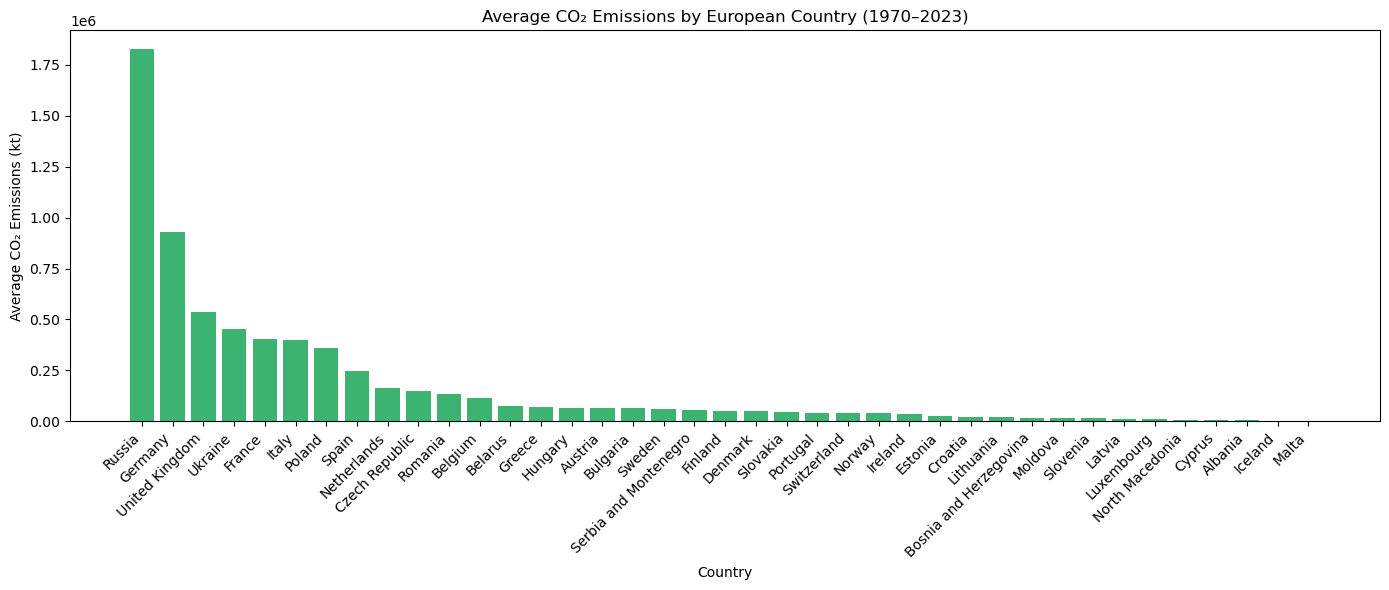

In [6]:
# Plotting the results
plt.figure(figsize=(14, 6))
plt.bar(df_top_10["Name"], df_top_10["Average_CO2"], color='mediumseagreen')
plt.ylabel("Average CO₂ Emissions (kt)")
plt.xlabel("Country")
plt.title("Average CO₂ Emissions by European Country (1970–2023)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This section focuses on the top 10 European countries with the highest average CO₂ emissions. As expected the top CO2 emission countries are the bigger ones with highly developed industries.
Next we plot a timeline showing how their emissions changed over time, allowing us to observe trends and compare their emission patterns over time.

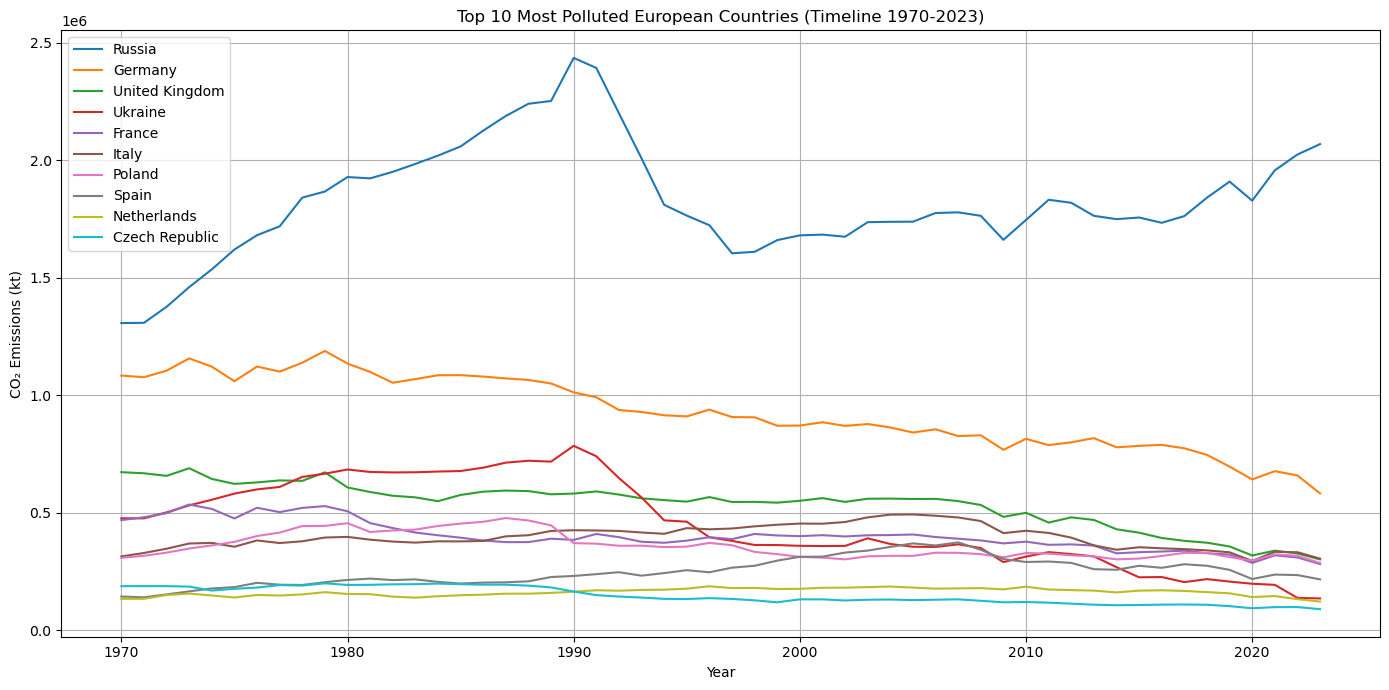

In [7]:
# Getting the top 10 countries with most CO2 emissions over the years from 1970-2023
df_top10 = df_avg.sort_values(by="Average_CO2", ascending=False).head(10)

df_plot = df_top10.set_index("Name")[year_columns].T
df_plot.index = df_plot.index.astype(int)  

# And plotting the timeline of CO2 emissions by country (top 10 with most emissions)
plt.figure(figsize=(14, 7))
for country in df_plot.columns:
    plt.plot(df_plot.index, df_plot[country], label=country)

plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (kt)')
plt.title('Top 10 Most Polluted European Countries (Timeline 1970-2023)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We also performed the same analysis for the top 10 European countries with the lowest average CO₂ emissions to compare trends on the opposite end of the spectrum.

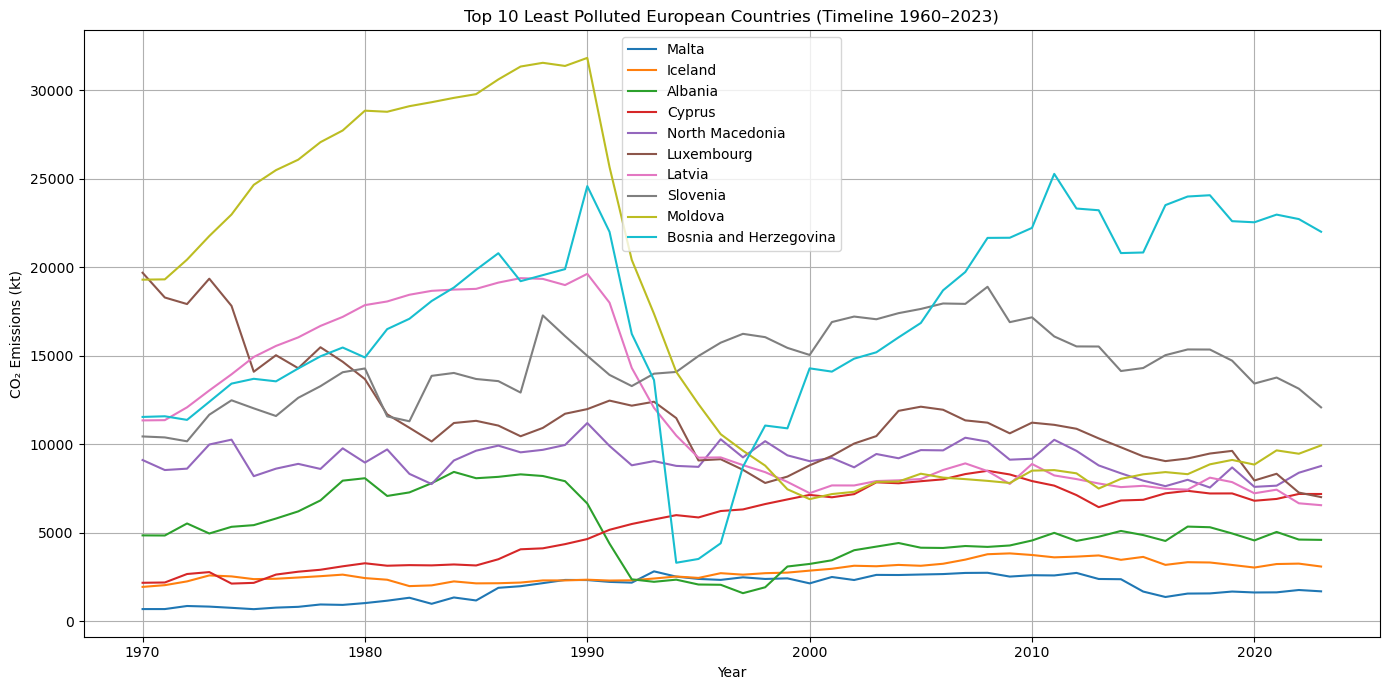

In [8]:
# Getting the top 10 countries with least CO2 emissions over the years from 1970-2023
df_plot_bottom10 = df_avg.sort_values(by="Average_CO2", ascending=True).head(10)

df_plot_bottom10 = df_plot_bottom10.set_index("Name")[year_columns].T
df_plot_bottom10.index = df_plot_bottom10.index.astype(int)

# And plotting the timeline of CO2 emissions by country (top 10 with least emissions)
plt.figure(figsize=(14, 7))
for country in df_plot_bottom10.columns:
    plt.plot(df_plot_bottom10.index, df_plot_bottom10[country], label=country)

plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (kt)')
plt.title('Top 10 Least Polluted European Countries (Timeline 1960–2023)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


While we initially expected the charts to show an **upward trend**—since pollution is generally perceived to be increasing over time-the data actually reveals a **decline in CO₂ emissions** across most European countries from *1970* to *2023*. 
This was surprising, as we assumed emissions would rise with industrial growth and increased energy use. 

An interesting example is Lithuania, which shows noticeable spikes in certain years.

These irregularities stand out in the plot and will be the subject of further investigation.